# From top to bottom

[![GitHub License](https://img.shields.io/github/license/Dragon1573/PyChallenge-Tips?color=important&label=Licence&style=flat-square)](https://github.com/Dragon1573/PyChallenge-Tips/blob/master/LICENSE)
[![Jump to Level 24](https://img.shields.io/badge/Jump%20to-Level%2024-blue?style=flat-square)](http://www.pythonchallenge.com/pc/hex/ambiguity.html)

<center><img src="../../resources/imgs/Quiz24-1.png" /></center>

&emsp;&emsp;卧槽`w(ﾟДﾟ)w`，这是迷宫吧？关卡标题的提示是**从上到下**，估计是要我们用Python程序走迷宫。$100\%$模式下的迷宫太密集了，先把图片复制到本地，放大并寻找迷宫的出入口。

<center>
    <img src="../../resources/imgs/Quiz24-2.png" />
    <img src="../../resources/imgs/Quiz24-3.png" />
</center>

&emsp;&emsp;通过上面放大到$800\%$的迷宫图，可以确定起点坐标为$(639, 0)$、终点坐标为$(1, 640)$，我们可以选择任意的迷宫搜索算法求解迷宫路径。迷宫的黑色走道中存在大量红色或褐色的像素点，它们可能是需要被我们收集整理的有用信息。

In [1]:
from requests import get
from io import BytesIO
from PIL import Image
import zipfile

In [2]:
""" 获取图片 """
response = get(
    'http://www.pythonchallenge.com/pc/hex/maze.png',
    headers={'Authorization': 'Basic YnV0dGVyOmZseQ=='}
)
image = Image.open(BytesIO(response.content))

In [3]:
""" 定义全局常量 """
DIRECTION = ((0, 1), (0, -1), (1, 0), (-1, 0))
(START, GOAL) = ((639, 0), (1, 640))
WHITE = (255, 255, 255, 255)
queue = [GOAL]
next_p = {}

In [4]:
""" 广度优先搜索 """
while queue:
    pos = queue.pop(0)
    if pos == START:
        break
    for d in DIRECTION:
        temp = (pos[0] + d[0], pos[1] + d[1])
        if (temp not in next_p and
            0 <= temp[0] < image.size[0] and
            0 <= temp[1] < image.size[1] and
            image.getpixel(temp) != WHITE):
            next_p[temp] = pos
            queue.append(temp)

In [5]:
""" 获取路径并提取路径数据 """
path = []
while pos != GOAL:
    path.append(image.getpixel(pos)[0])
    pos = next_p[pos]
archives = zipfile.ZipFile(
    BytesIO(bytes(path[1::2])),
    compression=zipfile.ZIP_DEFLATED
)

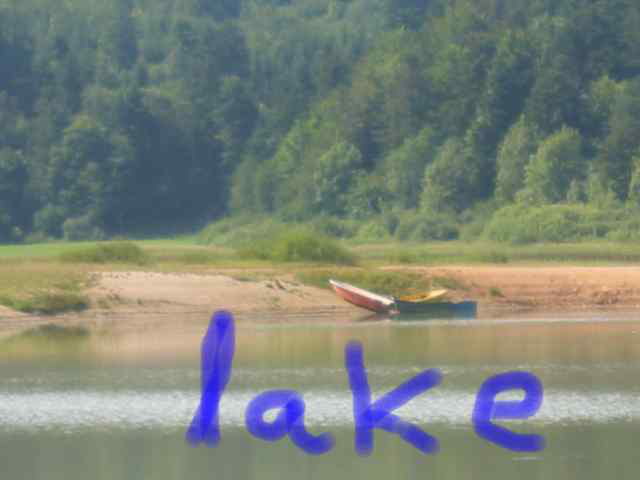

In [6]:
""" 显示图片 """
display(Image.open(archives.open('maze.jpg', 'r')))

&emsp;&emsp;因此，下一关的链接为<http://www.pythonchallenge.com/pc/hex/lake.html>。